<a href="https://colab.research.google.com/github/n9hquan/QR103/blob/main/Homework_2.4_Effect_of_factors_in_OLS_regression_Nguyen_Chinh_Quan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
import statsmodels.api as sm

In [2]:
uploaded = files.upload()
dataReg = pd.read_excel(io.BytesIO(uploaded["datareg.xlsx"]))

Saving datareg.xlsx to datareg.xlsx


In [4]:
sex = dataReg.HHSEX
age = dataReg.AGE
edu = dataReg.EDUC
income = dataReg.INCOME/100000 # unit of income now is $100,000
wealth = dataReg.NETWORTH/100000 # unit of wealth is $100,000

In [8]:
logincome = np.log(income+1) # note that 1 here is equivalent to $100,000 since we changed the unit of income
logincome

0        0.184741
1        0.184741
2        0.184741
3        0.184741
4        0.184741
           ...   
30070    0.326077
30071    0.311324
30072    0.303865
30073    0.362035
30074    0.347806
Name: INCOME, Length: 30075, dtype: float64

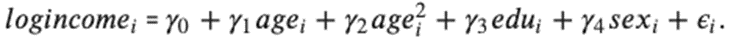

In [6]:
X = np.column_stack((age,age**2,edu,sex))
X

array([[  54, 2916,   11,    1],
       [  54, 2916,   11,    1],
       [  54, 2916,   11,    1],
       ...,
       [  76, 5776,   13,    1],
       [  76, 5776,   13,    1],
       [  76, 5776,   13,    1]])

In [7]:
X = sm.add_constant(X)

In [9]:
model1 = sm.OLS(logincome,X) # model1 = sm.RLM(logincome,X) # robust model
reg1 = model1.fit()

In [10]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 INCOME   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     2566.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:08:39   Log-Likelihood:                -39352.
No. Observations:               30075   AIC:                         7.871e+04
Df Residuals:                   30070   BIC:                         7.876e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8584      0.056    -33.213      0.0